<a href="https://colab.research.google.com/github/DhrumilPrajapati03/Unstructured-change-detection-using-CNN/blob/main/Unstructured_change_detection_using_Architectural_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step


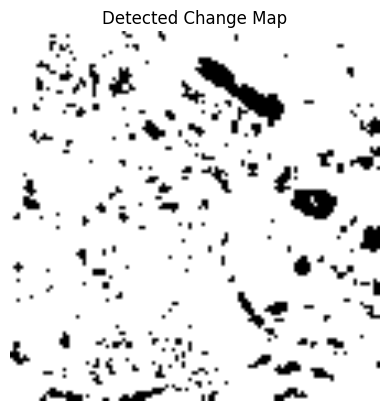

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, exposure
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from skimage.transform import resize

def build_vgg19():
    inputs = Input(shape=(224, 224, 3))

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    block1_output = x

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    block2_output = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    block3_output = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    block4_output = x

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    block5_output = x

    model = Model(inputs, [block1_output, block2_output, block3_output, block4_output, block5_output])
    return model

def extract_features(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features

def change_detection():
    model = build_vgg19()

    img1_path = "/content/img1.png"
    img2_path = "/content/img2.png"

    F1 = extract_features(model, img1_path)
    F2 = extract_features(model, img2_path)

    dis_maps = []
    for f1, f2 in zip(F1, F2):
        diff = np.square(f1 - f2)
        dis_map = np.sum(diff, axis=-1)  # Summing across feature channels
        dis_maps.append(dis_map[0])

    # Resize feature maps to the same size before averaging
    base_shape = dis_maps[0].shape #take the shape of the first feature map
    resized_dis_maps = [resize(dis_map, base_shape) for dis_map in dis_maps]

    dis_final = np.mean(resized_dis_maps, axis=0)  # Averaging feature maps
    val = filters.threshold_otsu(dis_final)

    plt.title('Detected Change Map')
    plt.imshow(dis_final < val, cmap='gray', interpolation='bilinear')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    change_detection()